# DIABETES PREDICTION USING LOGISTIC REGRESSION

# Importing libraries:

In [1]:
import pandas as pd    #for data manipulation and analysis
import numpy as np      #for numerical operations and array manipulation
import matplotlib.pyplot as plt   #for creating visualization
import seaborn as sns    #for advanced data visualization
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Importing the dataset:

In [2]:
data = pd.read_csv ("diabetes2.csv")  #reads the dataset from csv file

# Creating a DataFrame:

In [3]:
df = pd.DataFrame (data)  #creates a dataframe from the imported data
df.head()                  #displays the first few rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Exploration:

In [4]:
print ("Shape of data {}" . format (df.shape))     #provides the dimensions of the dataframe
print ("Number of rows: {}" . format (df.shape [0]))  
print ("Number of columns: {}" . format (df.shape [1]))

Shape of data (768, 9)
Number of rows: 768
Number of columns: 9


In [5]:
df.info ()   #provides information about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe() #summarizes the columns with mean,standard deviation,quartiles etc..,

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.columns  #list the column names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean()) #replacing zeros in SkinThickness with mean values

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,0,33.6,0.627,50,1
1,1,85,66,29.000000,0,26.6,0.351,31,0
2,8,183,64,20.536458,0,23.3,0.672,32,1
3,1,89,66,23.000000,94,28.1,0.167,21,0
4,0,137,40,35.000000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180,32.9,0.171,63,0
764,2,122,70,27.000000,0,36.8,0.340,27,0
765,5,121,72,23.000000,112,26.2,0.245,30,0
766,1,126,60,20.536458,0,30.1,0.349,47,1


In [10]:
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())#replacing zeros in Insulin with mean values

In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


## Outlier Removal

In [12]:
def remove_outlier (dataFrame):    #Function to remove outliers using interquartile range[IQR] method.
    for column_name in dataFrame.columns:
        Q1=df[column_name].quantile(0.25)
        Q3=df[column_name].quantile(0.75)
        IQR=Q3-Q1
        lower_limit=Q1-1.5*IQR
        upper_limit=Q3+1.5*IQR
        print(f"{column_name} >> Lower limit: {lower_limit} \n Upper limit: {upper_limit}")
        dataFrame=dataFrame[(dataFrame[column_name]>lower_limit)|(dataFrame[column_name]<upper_limit)]
        
    return dataFrame

In [13]:
df = remove_outlier(df)

Pregnancies >> Lower limit: -6.5 
 Upper limit: 13.5
Glucose >> Lower limit: 37.125 
 Upper limit: 202.125
BloodPressure >> Lower limit: 35.0 
 Upper limit: 107.0
SkinThickness >> Lower limit: 3.341145833333332 
 Upper limit: 49.1953125
Insulin >> Lower limit: 8.623697916666671 
 Upper limit: 198.42578125
BMI >> Lower limit: 13.35 
 Upper limit: 50.550000000000004
DiabetesPedigreeFunction >> Lower limit: -0.32999999999999996 
 Upper limit: 1.2
Age >> Lower limit: -1.5 
 Upper limit: 66.5
Outcome >> Lower limit: -1.5 
 Upper limit: 2.5


# Handling Missing Values:

In [14]:
df.isnull().sum()  #checking for missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
#There are no missing values.
#Observation:
#There are 8 features and 768 entires, all non-null. All of the features are numerical and the target is categorical


# Checking For Duplicates values:

In [16]:
print ("Duplicate values in df are:" , df.duplicated().sum()) #counts the number of duplicate rows

Duplicate values in df are: 0


# Exploring Categorical Variables:

In [17]:
print(df['Outcome'].unique()) #prints the outcome

[1 0]


# Correlation Analysis:

In [18]:
df.corr() #calculates the correlation matrix between numerical columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.013376,-0.018082,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.145378,0.390835,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.180890,0.074858,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.013376,0.145378,0.180890,1.000000,0.240361,0.501131,0.154961,0.026423,0.175026
Insulin,-0.018082,0.390835,0.074858,0.240361,1.000000,0.189337,0.157806,0.038652,0.179185
BMI,0.017683,0.221071,0.281805,0.501131,0.189337,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.154961,0.157806,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.026423,0.038652,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.175026,0.179185,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:title={'center':'Correlation Graph'}>

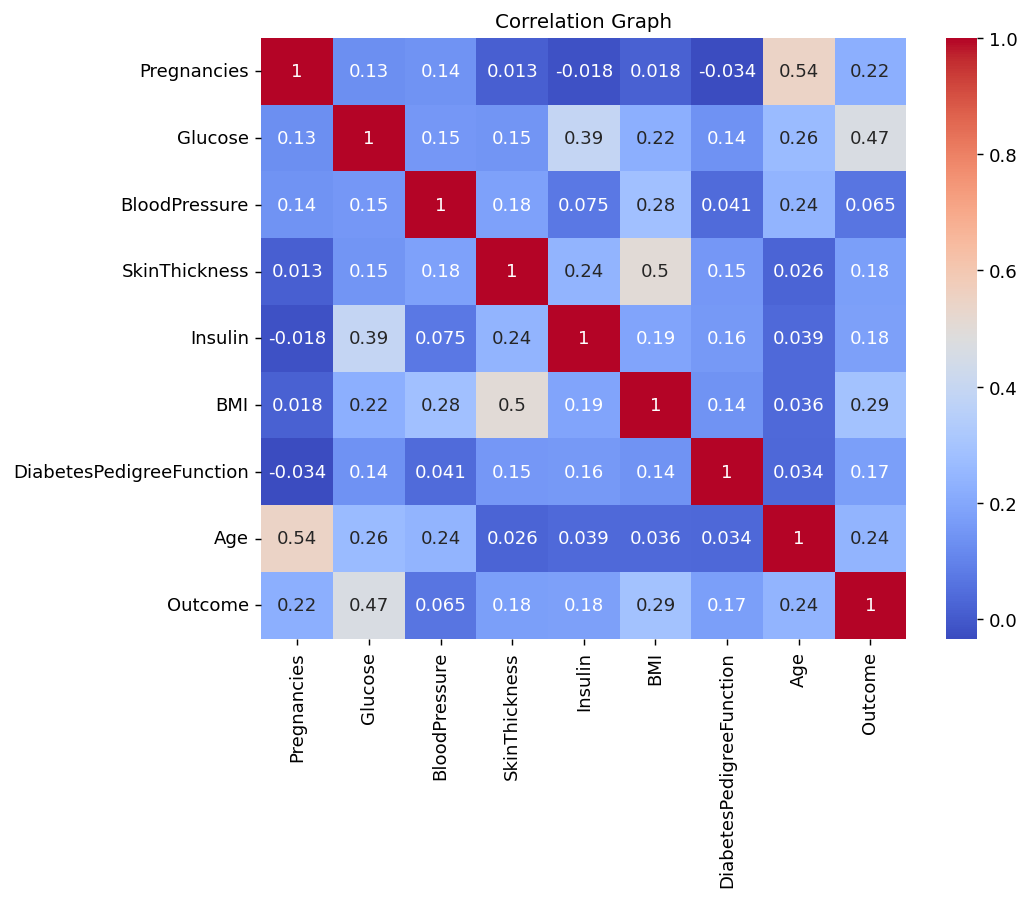

In [19]:
plt.figure (figsize = [8,6],  dpi = 130 )  #create figure for visualization
plt.title ("Correlation Graph" , fontsize = 11 ) 
sns.heatmap (df.corr(), annot = True , cmap="coolwarm" )
#creates heatmap to visualize correlation with numerical values annotated.

# Data Visualization

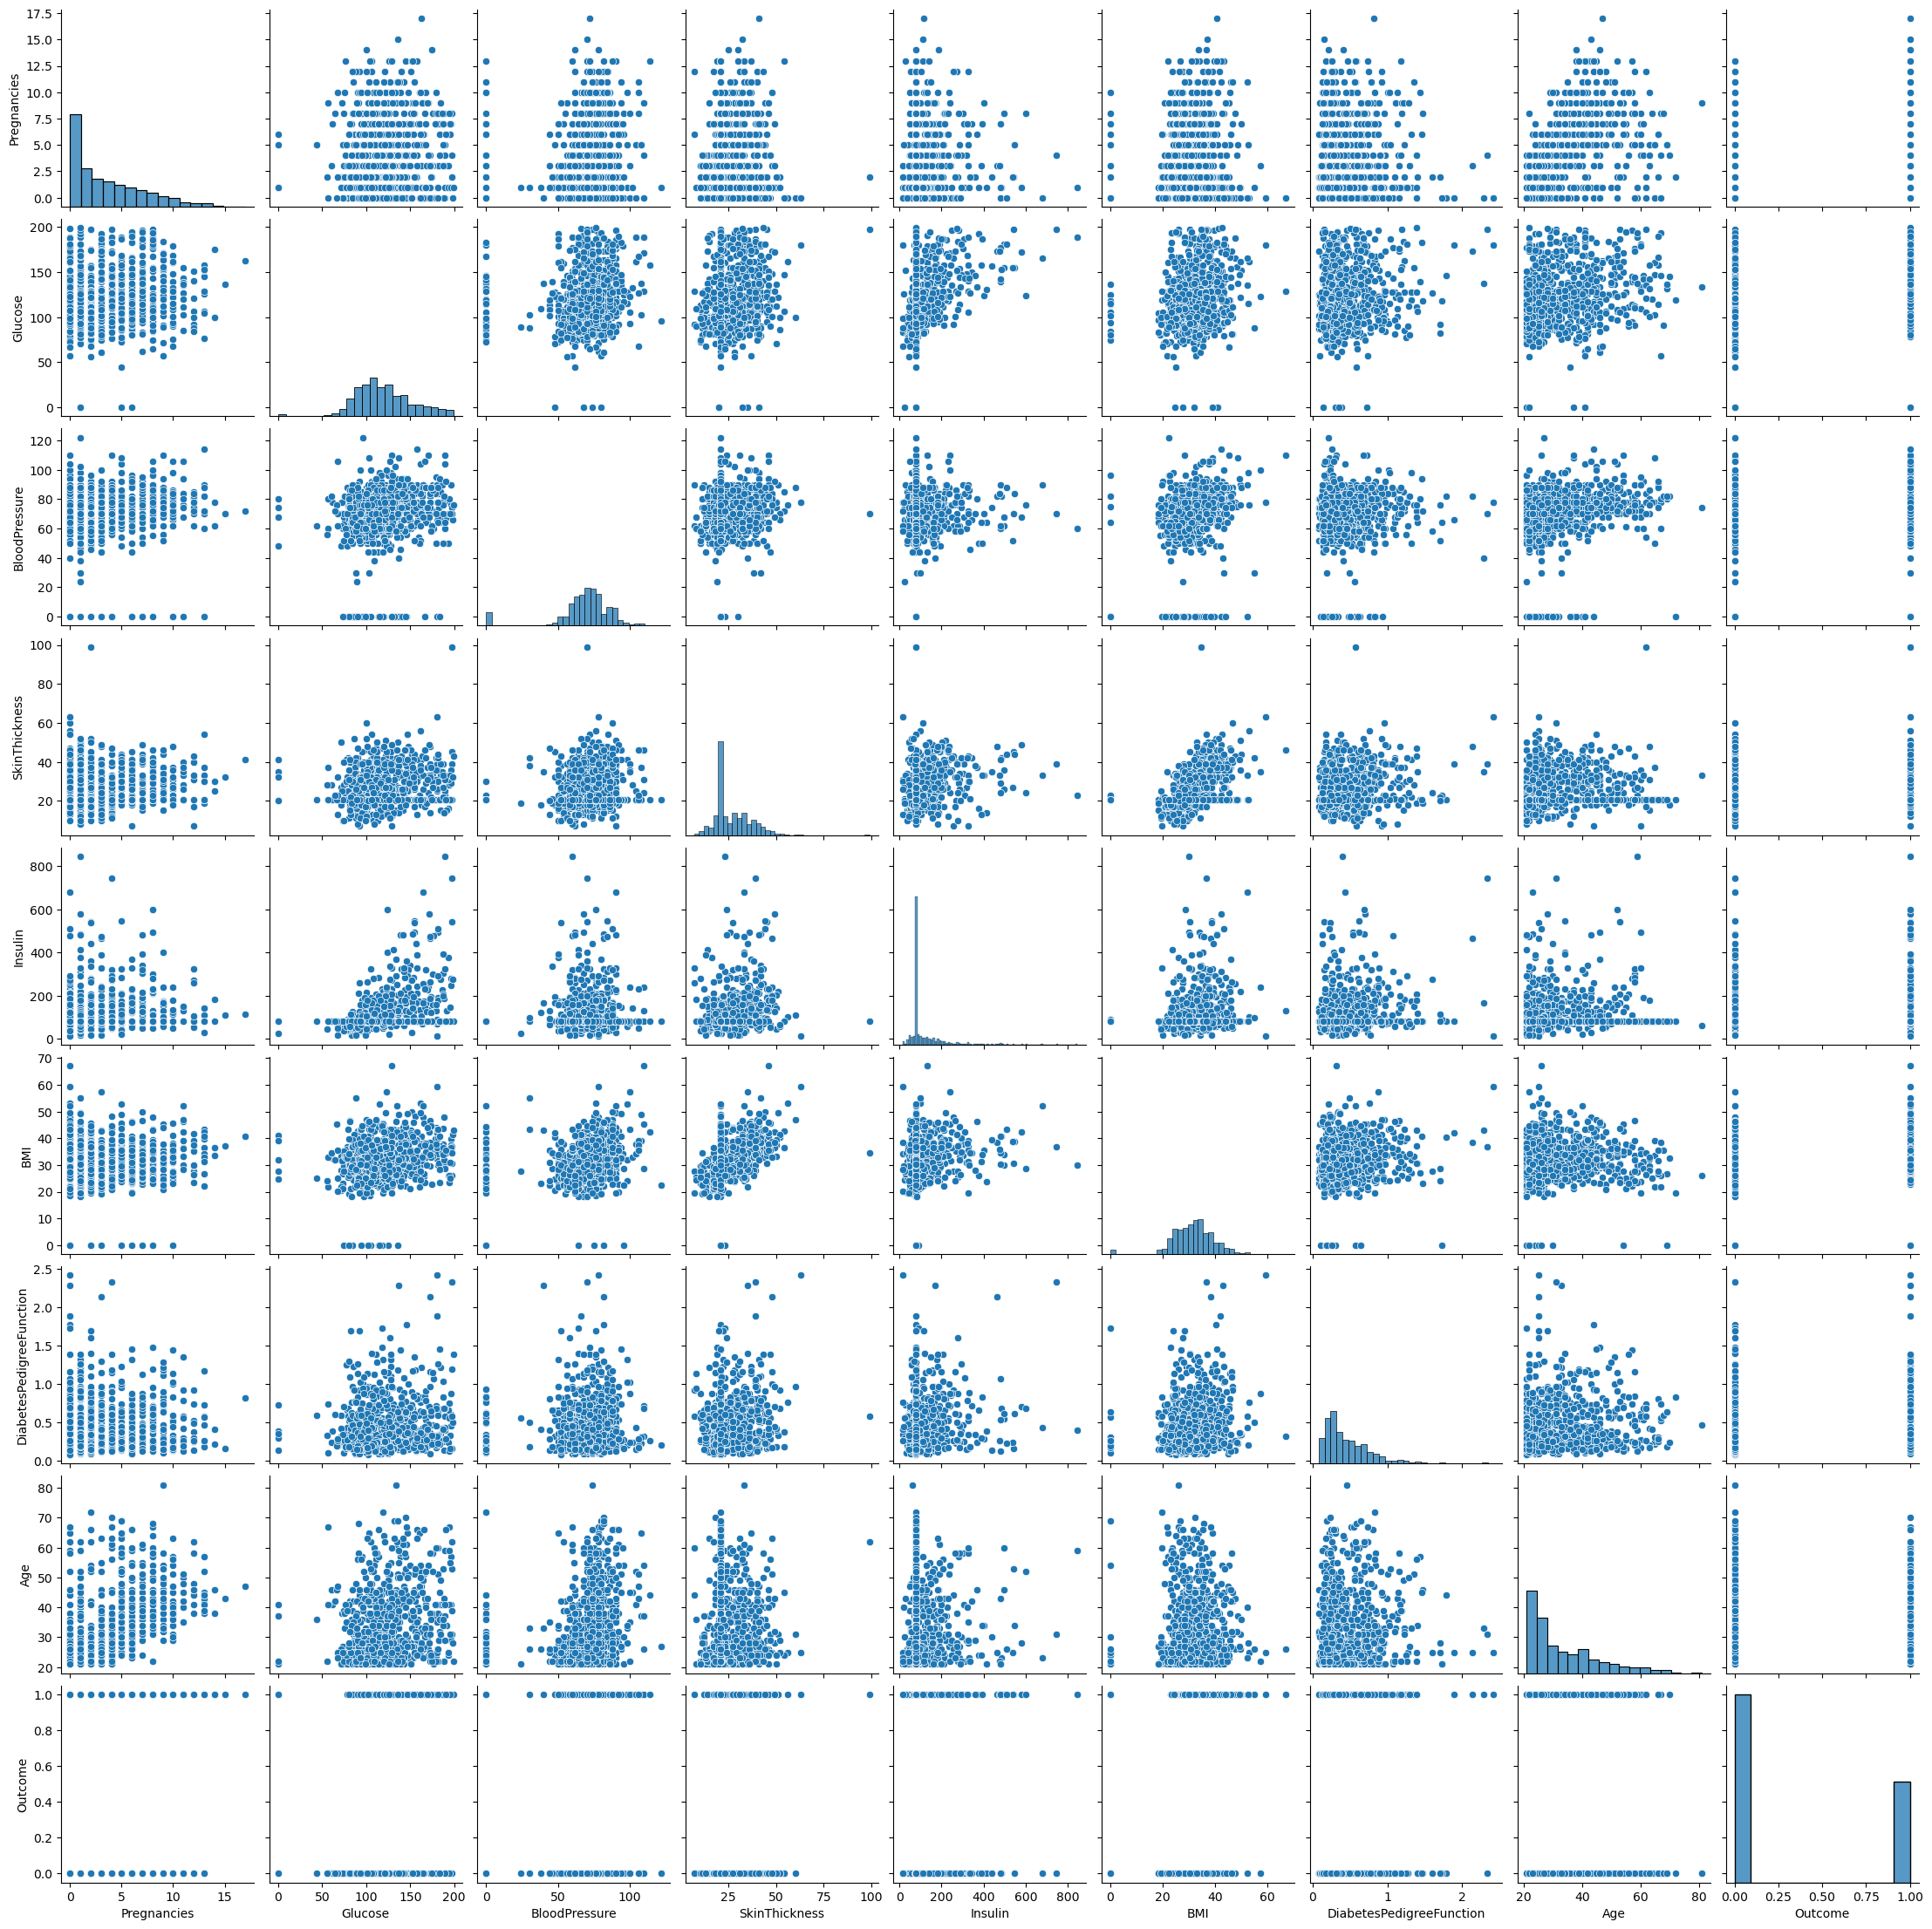

In [20]:
sns.pairplot(df)  #creates pairwise plots to visualize relationships between variables

# The relationship between Glucose and Diabetes

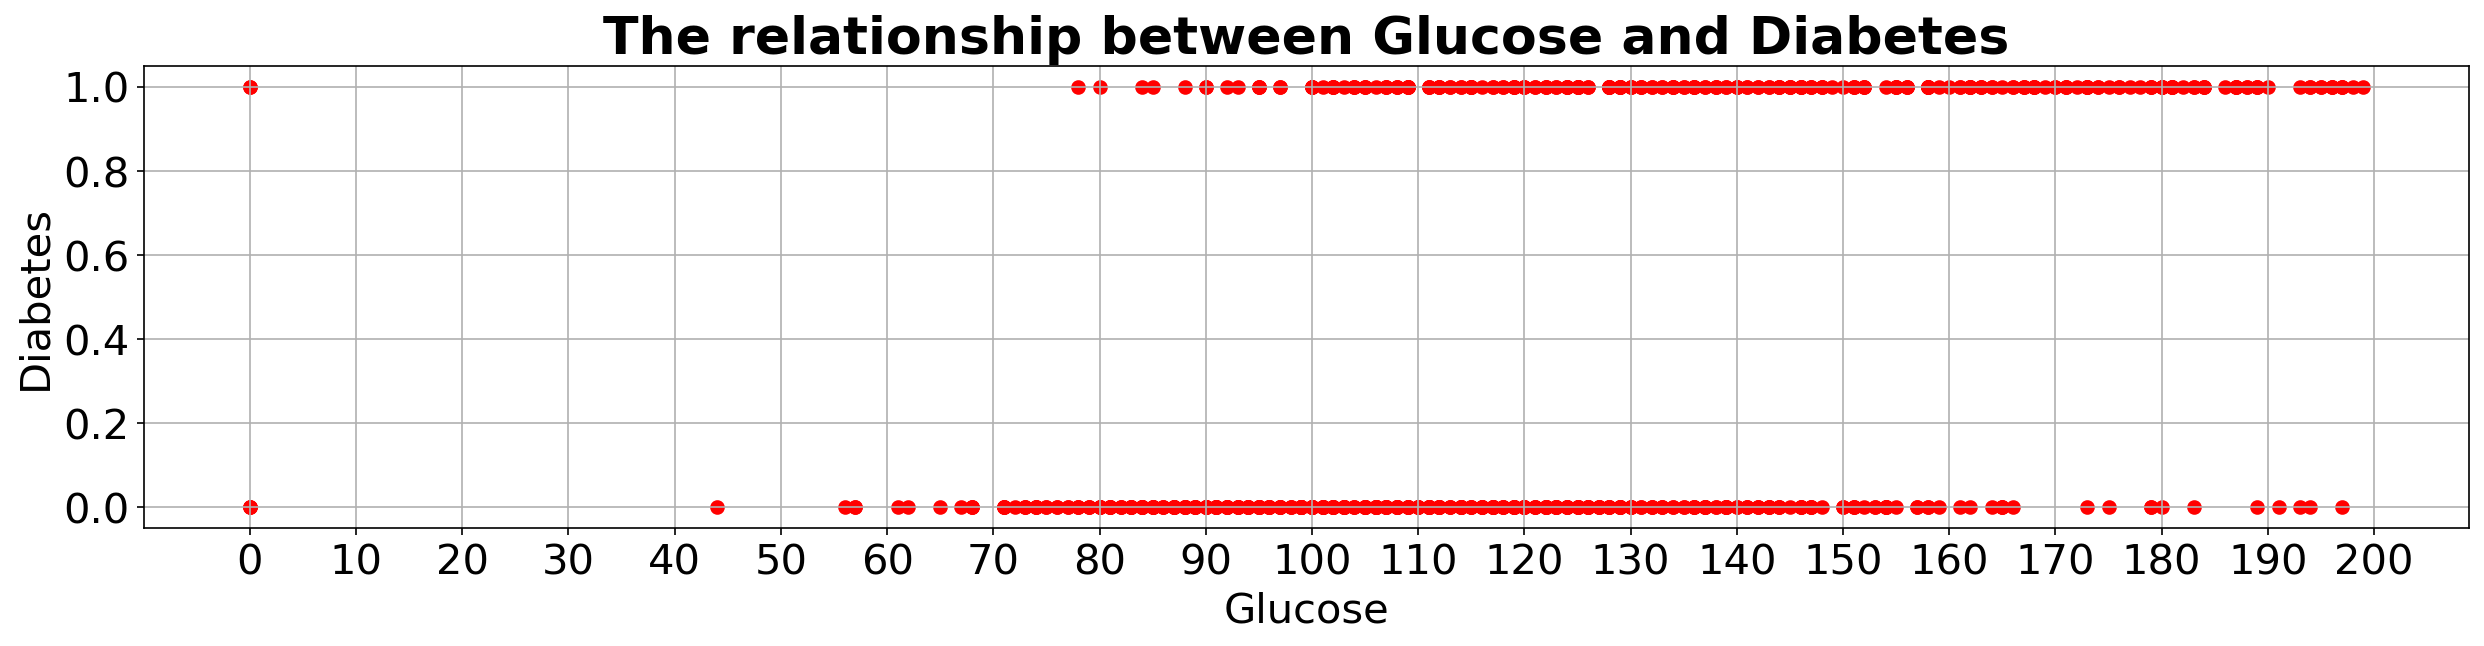

In [21]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["Glucose"] , df["Outcome"] , color = "red")  
# creates scatter plots to visualize relationships between glucose and the Diabetes.
plt.title ("The relationship between Glucose and Diabetes" , weight='bold', fontsize = 25)
plt.xticks (range (0 , 205 , 10), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Glucose', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

# The relationship between Age and Diabetes

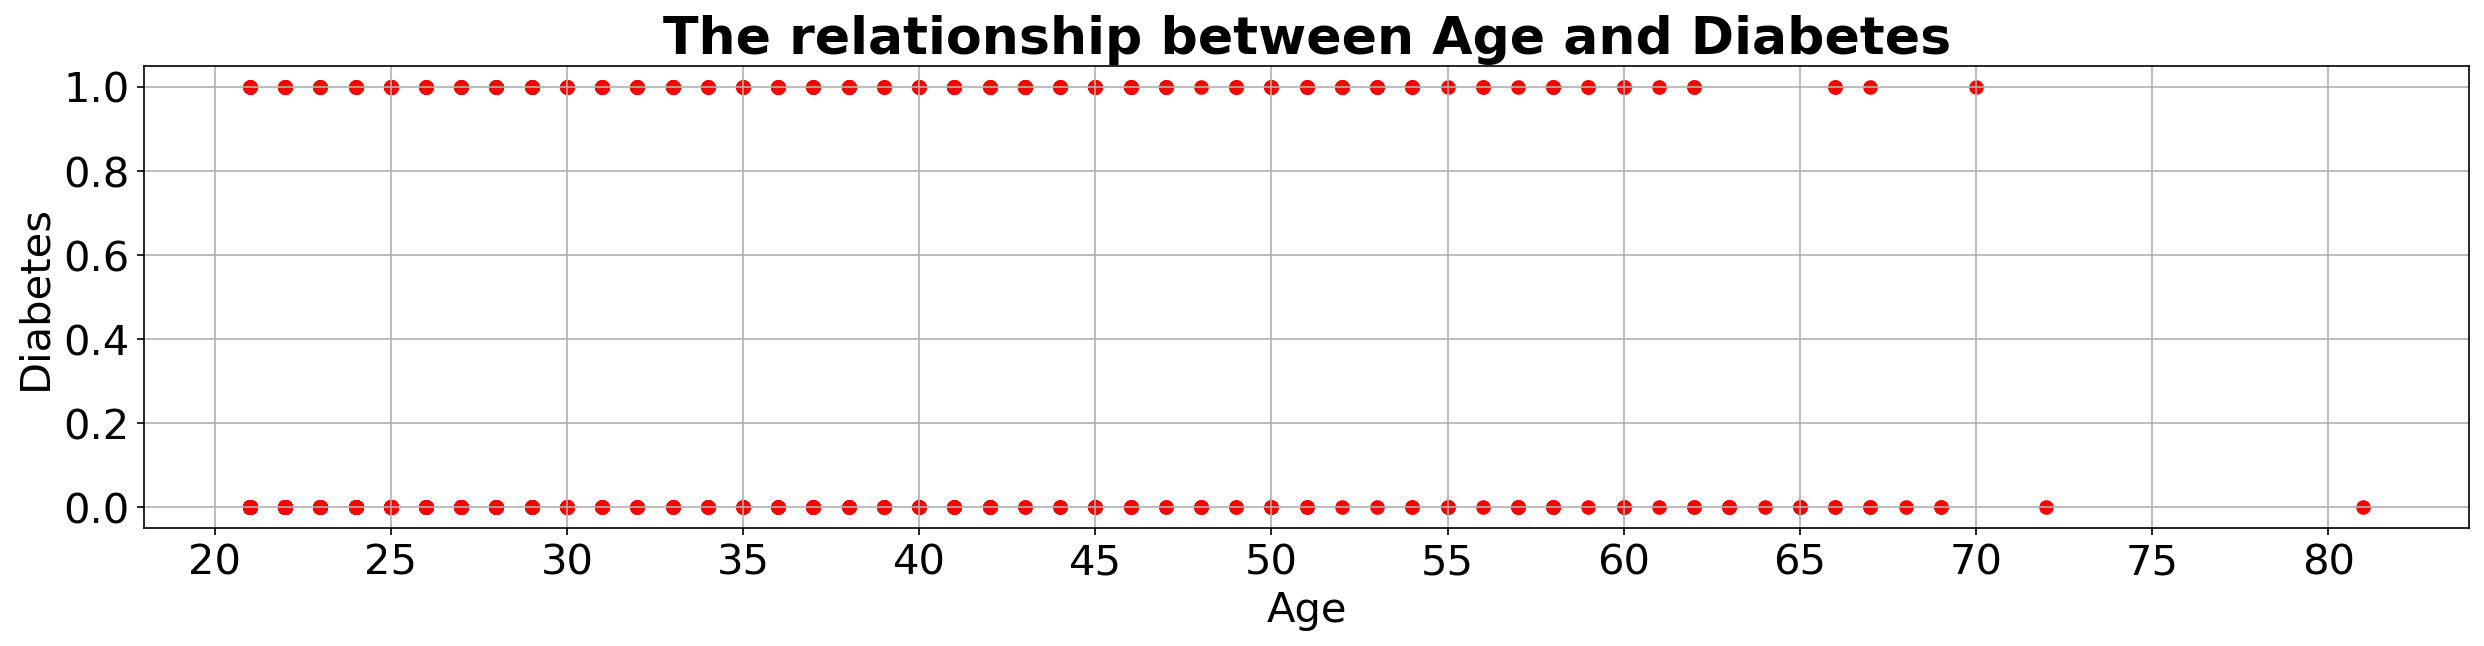

In [22]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["Age"] , df["Outcome"] , color = "red")
# creates scatter plots to visualize relationships between age and the Diabetes.
plt.title ("The relationship between Age and Diabetes" , weight='bold', fontsize = 25)
plt.xticks (range (20 , 85 , 5), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Age', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()


# The relationship between BMI and DIABETES

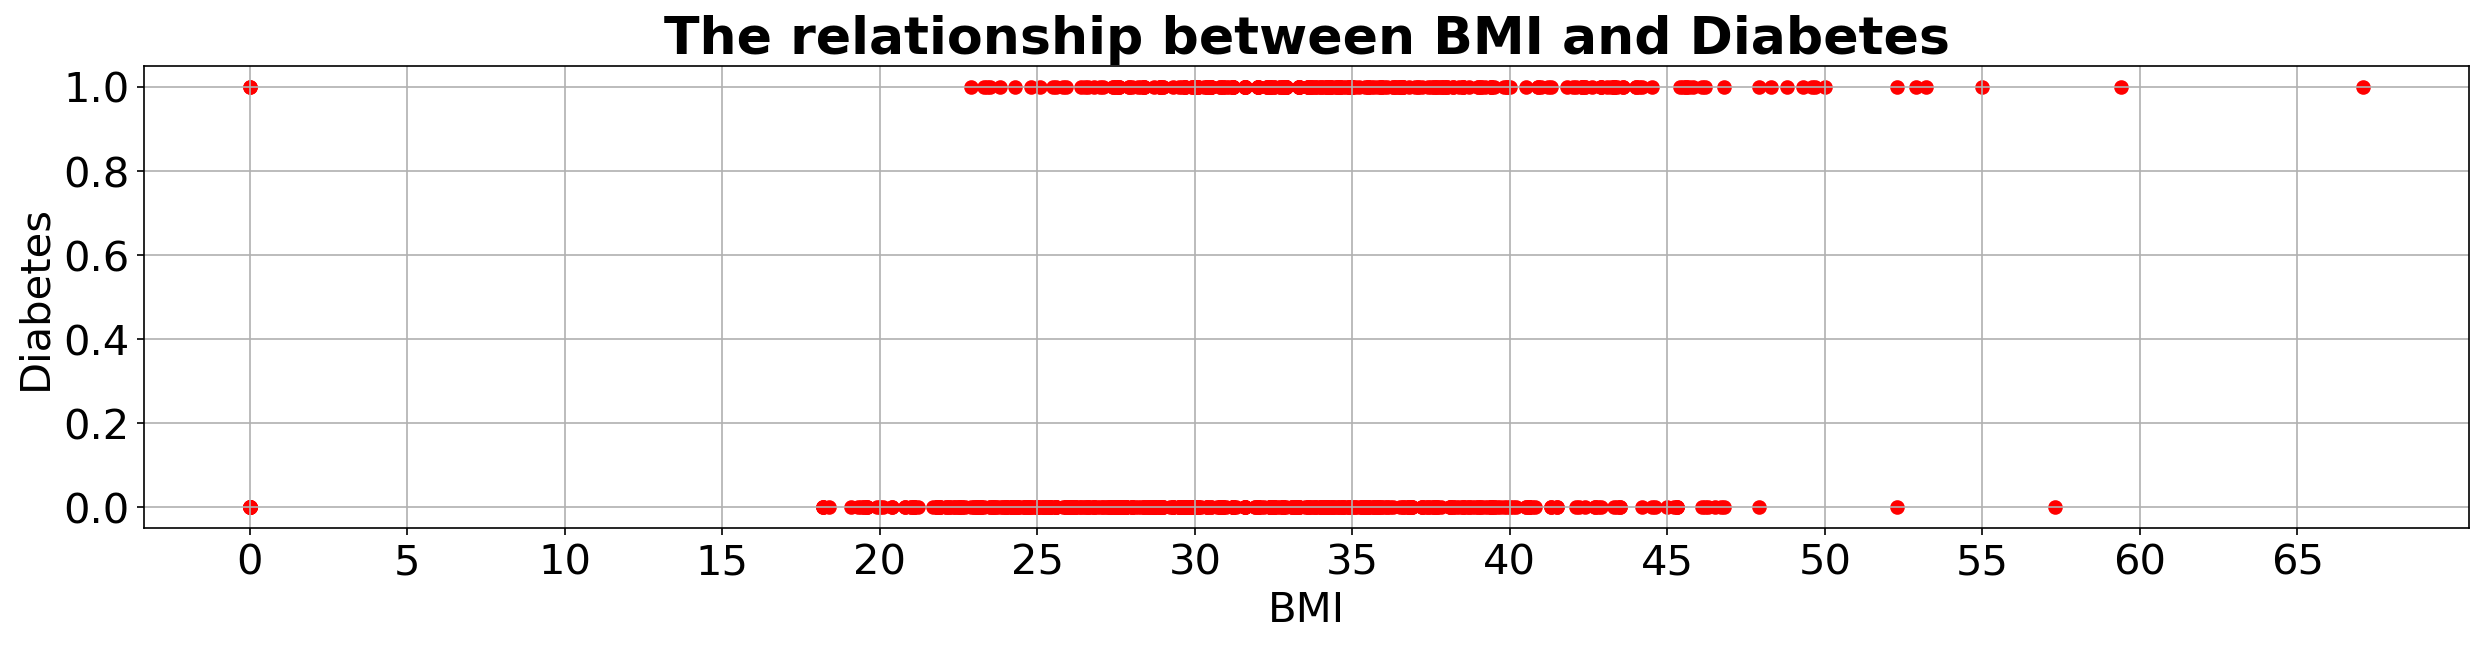

In [23]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["BMI"] , df["Outcome"] , color = "red")
# creates scatter plots to visualize relationships between BMI and the Diabetes.
plt.title ("The relationship between BMI and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 70 , 5) , fontsize=20)
plt.yticks (fontsize = 20)
plt.xlabel ('BMI', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

# The relationship between Insulin and Diabetes

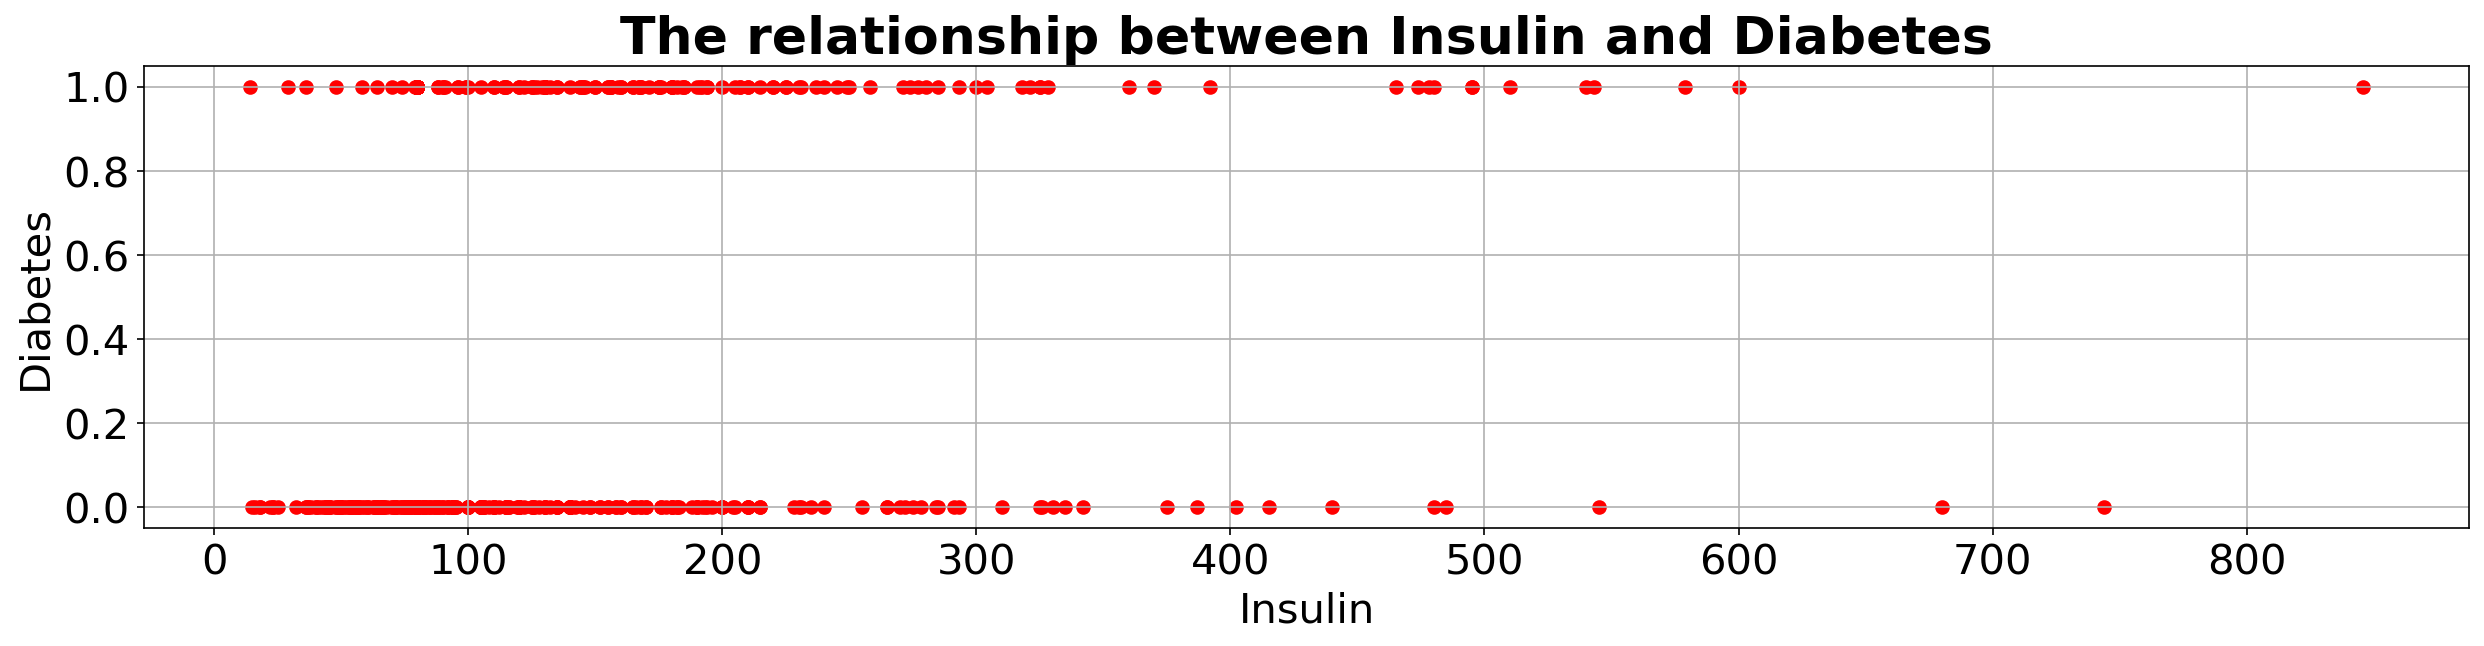

In [24]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["Insulin"] , df["Outcome"] , color = "red")
# creates scatter plots to visualize relationships between Insulin and the Diabetes.
plt.title ("The relationship between Insulin and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 900 , 100) , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Insulin', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

# The relationship between BloodPressure and Diabetes

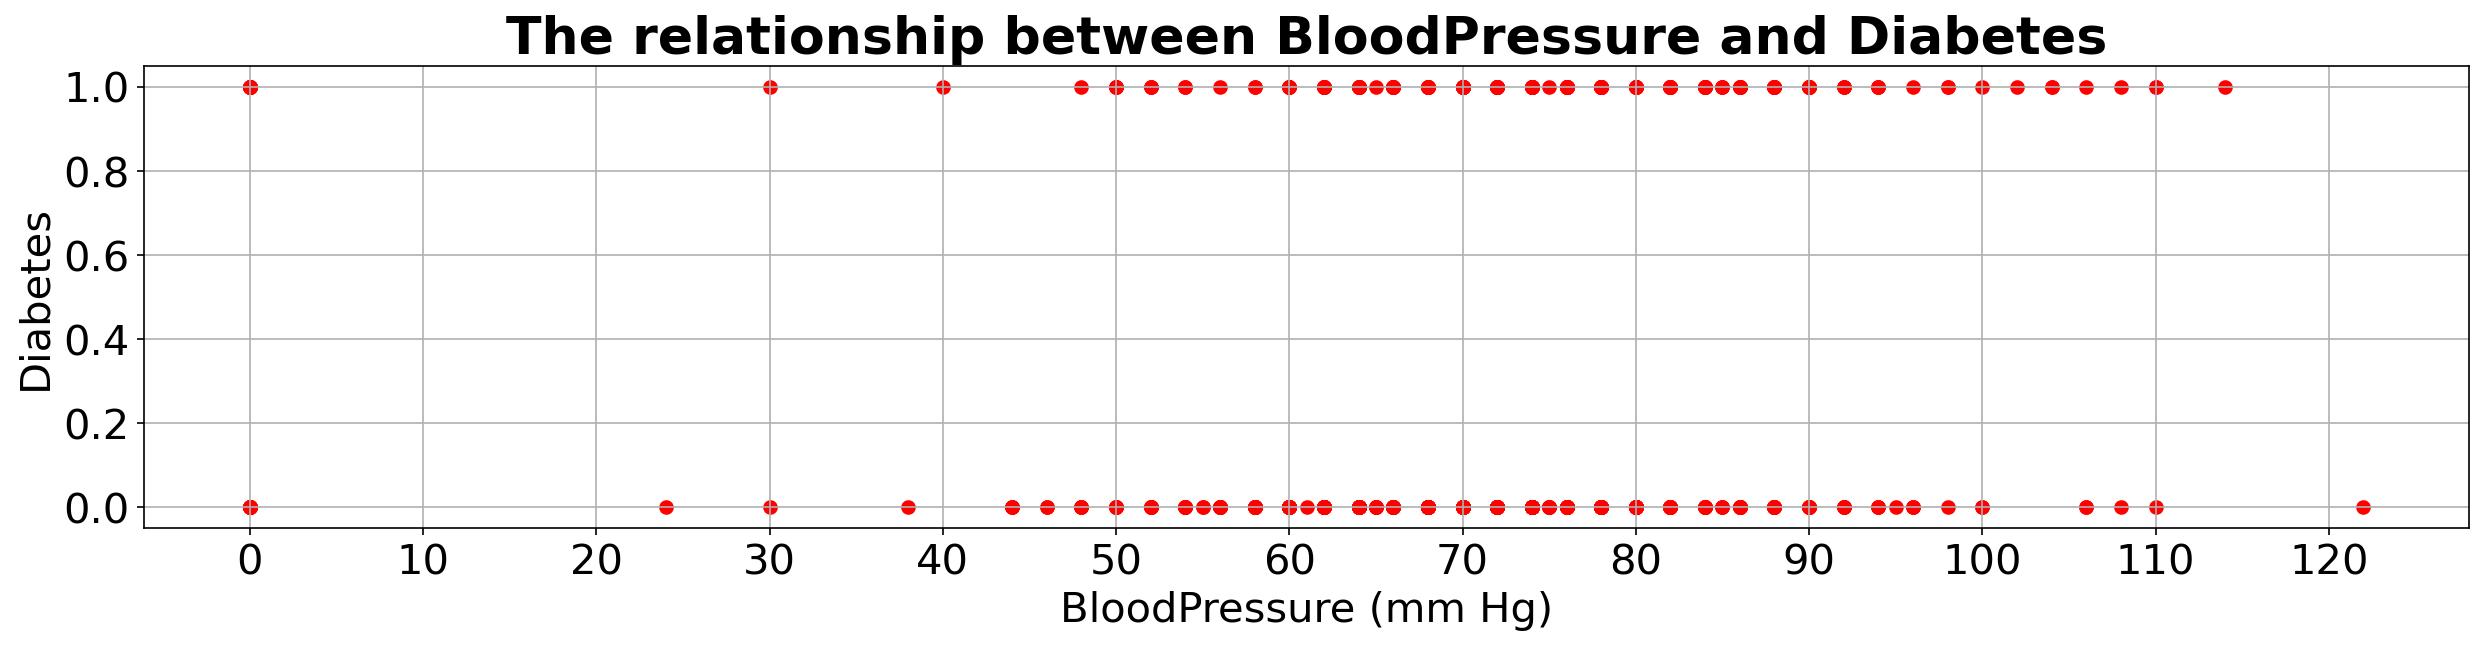

In [25]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["BloodPressure"] , df["Outcome"] , color = "red")
# creates scatter plots to visualize relationships between BP and the Diabetes.
plt.title ("The relationship between BloodPressure and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 125 , 10) , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('BloodPressure (mm Hg)', fontsize = 20)
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

# The relationship between Age and BMI

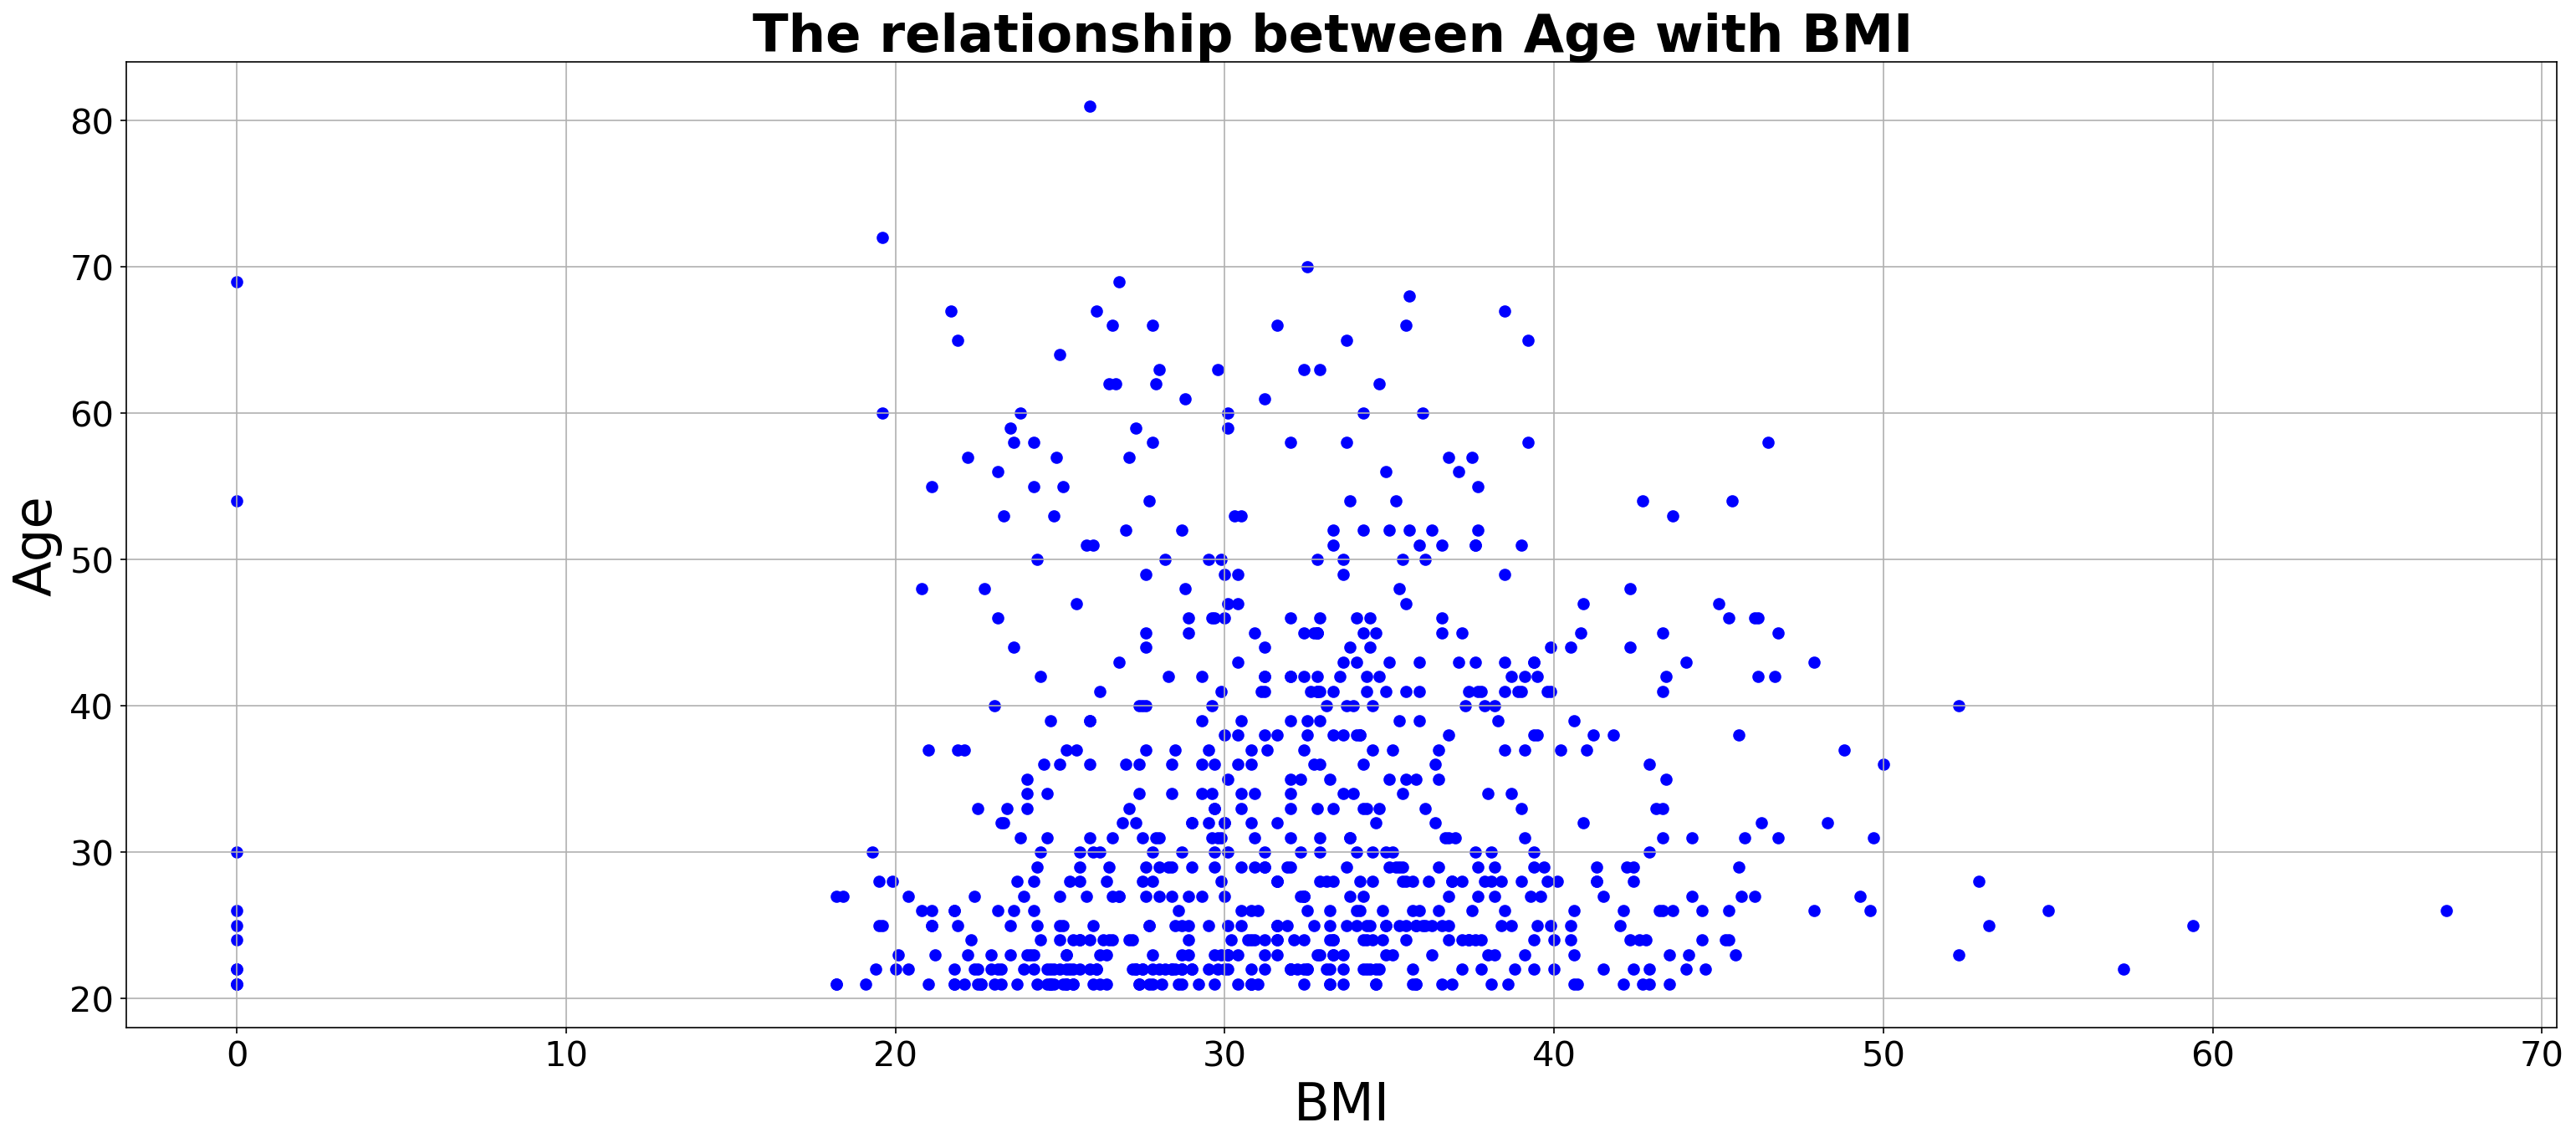

In [26]:
plt.figure(figsize = [25, 10] , dpi = 150) 
plt.scatter (df["BMI"] , df["Age"] , color = "blue")
# creates scatter plots to visualize relationships between Age and the BMI.
plt.title ("The relationship between Age with BMI " , weight = 'bold', fontsize = 30)
plt.xticks (range (0 , 80 , 10) , fontsize = 20)
plt.yticks (range (20 , 90 , 10) , fontsize = 20)
plt.xlabel ('BMI', fontsize = 30 )
plt.ylabel ('Age' , fontsize = 30)
plt.grid ()
plt.show ()

# Feature Selection:

In [27]:
X = pd.DataFrame (data , columns = ["Pregnancies" , "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" , "BMI"
                                   , "DiabetesPedigreeFunction" , "Age"]) # Features(independent variables)
y = data.Outcome # Target variables(dependent variables)

# Among the 768 people, 268 people suffer from diabetes and 500 people do not have diabetes.

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

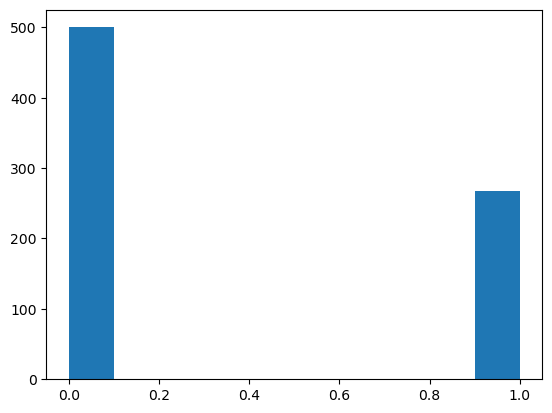

In [28]:
plt.hist (y)

# Data Splitting:

# Training = 75 , Testing = 25

In [29]:
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.25 , random_state = 0)

# Model Building and Evaluation:

In [30]:
logreg = LogisticRegression (solver = "liblinear") #Creates a logistic regression model
logreg.fit (X_train , y_train)        # Fitting a  model(Trains the model on the training set).   
y_pred = logreg.predict(X_test)          # Predicted class labels from test features(makes preditions on the training set.)

In [31]:
print ("Accuracy: " , metrics.accuracy_score (y_test , y_pred))  #calculate accuracy of predictions.

Accuracy:  0.8072916666666666


# Confusion matrix

In [32]:
confusion_matrix (y , logreg.predict (X)) #creates a confussion matrix to visualize true vs predicted outcomes.

array([[447,  53],
       [117, 151]], dtype=int64)

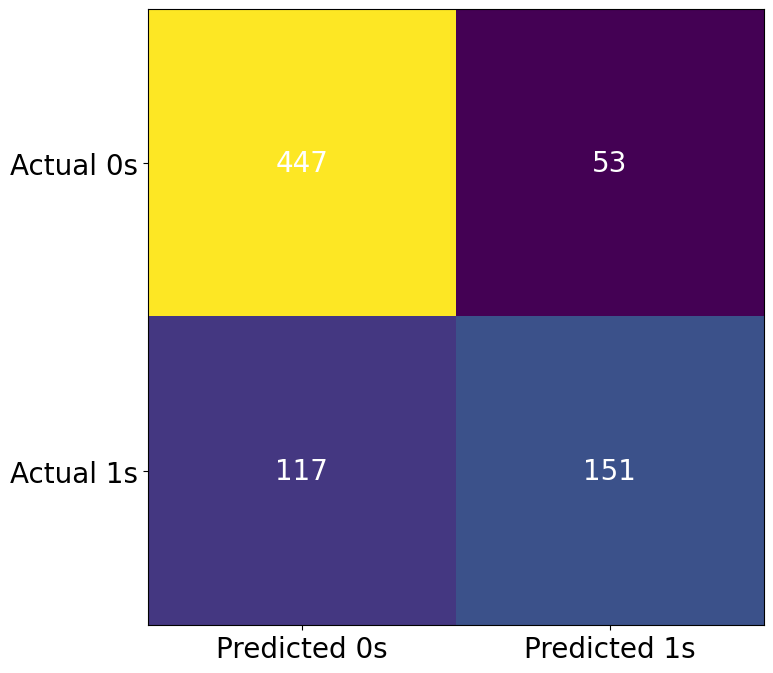

In [33]:
cm = confusion_matrix (y , logreg.predict(X))

fig , ax = plt.subplots (figsize = (8,8))
ax.imshow (cm)
ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("Predicted 0s" , "Predicted 1s"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = ("Actual 0s" , "Actual 1s"))

ax.tick_params(axis='both', which='major', labelsize=20)
#ax.tick_params(axis='both', which='minor', labelsize=20)
#plt.xticks(fontsize=14, rotation=90)

ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cm[i,j] , ha = "center" , va ="center" , color ="white", fontsize = 20 )
plt.show()


# Classification Report

In [34]:
print (classification_report (y , logreg.predict (X)))
#Prints detailed classification report with precision,recall,F1-score,etc.

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.74      0.56      0.64       268

    accuracy                           0.78       768
   macro avg       0.77      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768



# Additional Analysis and Prediction:

In [35]:
model2 = LogisticRegression (solver = "liblinear"  , C = 10.0 , random_state = 0)
#creates another model with adjusted hyperparameters.
model2.fit(X,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

# Creating a New Data Point:

In [36]:
df2 = pd.DataFrame ({"Pregnancies" : [0] , "Glucose" :[80] , "BloodPressure" :[72] ,"SkinThickness" : [0] ,
                    "Insulin" : [0] , "BMI" : [23] , "DiabetesPedigreeFunction" : [0.5] , 
                    "Age" : [30] , "Outcome" : [0]})
df2
#create a dataframe with a single row representing a new data point with various features and target values of 0(no diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,80,72,0,0,23,0.5,30,0


In [37]:
data2 = data.append(df2)
data2 #Appends this new data point to the original dataset.

C:\Users\MADHUBALA\AppData\Local\Temp\ipykernel_24828\1530935228.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data.append(df2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1
767,1,93,70,31.000000,79.799479,30.4,0.315,23,0


# Preparing Data for Model 2:

In [38]:
X_train = data2 [["Pregnancies" , "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" , "BMI"
, "DiabetesPedigreeFunction" , "Age"]] [:768]
#selects features for training from the updated dataset,using data up to the 768th row
y_train = data2[["Outcome"]][:768].values.reshape (-1,1)
#selects and reshapes target values for training.

In [39]:
X_test = data2 [["Pregnancies" , "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" , "BMI"
                                   , "DiabetesPedigreeFunction" , "Age"]] [768:]
#selects features for testing,using the newly added data point(769th row).

# Training and Prediction with Model 2

In [40]:
import warnings
warnings.filterwarnings("ignore")    #ignores potential warning during model training.
model2 = LogisticRegression (solver = "liblinear"  , C = 10.0 , random_state = 0)
#creates the second logistic regression model with adjusted regularization parametes(c).
model2.fit(X_train,y_train)       #Trains the second model on the updated training set.

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

# Final Prediction

In [41]:
y_pred = model2.predict (X_test)        #uses the second model to predict the outcome for the new line
y_pred                                   #prints the predicted outcome for the new data point.

array([0], dtype=int64)